In [1]:
import pandas as pd

df = pd.read_csv("FulDoc_Final.csv")
# dataset = df.Column1.tolist()

C:\Users\Sia\AppData\Local\Temp\ipykernel_13548\1302189025.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
df.columns

Index(['Document', 'Topic', 'Name', 'Representation', 'Representative_Docs',
       'Top_n_words', 'Probability', 'Representative_document'],
      dtype='object')

In [6]:
df.Topic

0         7
1         0
2        13
3         7
4         2
         ..
10254    14
10255     1
10256     9
10257     2
10258     7
Name: Topic, Length: 10259, dtype: int64

In [10]:
import pandas as pd

# Assuming df is your DataFrame containing the CSV data

# Group the DataFrame by the 'Topic' column
grouped = df.groupby('Topic')

# Iterate over each group
for topic, group in grouped:
    # Access documents within the group
    documents = group[['Document', 'Topic']].copy()
    
    # Save the group to a CSV file
    file_name = f"topic_{topic}_documents.csv"
    documents.to_csv(file_name, index=False)
    print(f"Saved documents for Topic {topic} to {file_name}")


Saved documents for Topic -1 to topic_-1_documents.csv
Saved documents for Topic 0 to topic_0_documents.csv
Saved documents for Topic 1 to topic_1_documents.csv
Saved documents for Topic 2 to topic_2_documents.csv
Saved documents for Topic 3 to topic_3_documents.csv
Saved documents for Topic 4 to topic_4_documents.csv
Saved documents for Topic 5 to topic_5_documents.csv
Saved documents for Topic 6 to topic_6_documents.csv
Saved documents for Topic 7 to topic_7_documents.csv
Saved documents for Topic 8 to topic_8_documents.csv
Saved documents for Topic 9 to topic_9_documents.csv
Saved documents for Topic 10 to topic_10_documents.csv
Saved documents for Topic 11 to topic_11_documents.csv
Saved documents for Topic 12 to topic_12_documents.csv
Saved documents for Topic 13 to topic_13_documents.csv
Saved documents for Topic 14 to topic_14_documents.csv
Saved documents for Topic 15 to topic_15_documents.csv
Saved documents for Topic 16 to topic_16_documents.csv
Saved documents for Topic 17 t

In [11]:
import pandas as pd

# Initialize an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Loop through topics 0 to 19
for topic in range(20):
    # Load the CSV file for the current topic
    file_name = f"topic_{topic}_documents.csv"
    df_topic = pd.read_csv(file_name)
    
    # Append the current topic's data to the combined DataFrame
    combined_df = pd.concat([combined_df, df_topic])

# Save the combined DataFrame to a single CSV file
combined_file_name = "combinedTopics_documents.csv"
combined_df.to_csv(combined_file_name, index=False)
print(f"Combined documents saved to {combined_file_name}")


Combined documents saved to combinedTopics_documents.csv


In [2]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)



In [17]:
df = pd.read_csv("combinedTopics_documents.csv")
dataset = df.Document.tolist()

def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

# res = {}
# for i, row in tqdm(dataset.iterrows(), total=len(dataset)):
#     try:
#         text = row['Text']
#         myid = row['Id']
#         vader_result = sia.polarity_scores(text)
#         vader_result_rename = {}
#         for key, value in vader_result.items():
#             vader_result_rename[f"vader_{key}"] = value
#         roberta_result = polarity_scores_roberta(text)
#         both = {**vader_result_rename, **roberta_result}
#         res[myid] = both
#     except RuntimeError:
#         print(f'Broke for id {myid}')

res = {}
for text in dataset:
    result = polarity_scores_roberta(text)
    res[text] = result

In [39]:
df = pd.read_csv("topic_18_documents.csv")
dataset = df.Document.tolist()

def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    
    scores = softmax(scores)

    max_score = max(scores[0],scores[1],scores[2])

    if max_score == scores[0]:
      scores_dict = {
            'neg' : scores[0],
        }
    elif max_score == scores[1]:
     scores_dict = {
            'neu' : scores[1]
        }
    elif max_score == scores[2]:
     scores_dict = {
            'pos' : scores[2]
        }
    # scores_dict = {
    #     'roberta_neg' : scores[0],
    #     'roberta_neu' : scores[1],
    #     'roberta_pos' : scores[2]
    # }
    return scores_dict
res = {}
for i,text in enumerate(dataset):
    result = polarity_scores_roberta(text)
    res[i] = result
# result = polarity_scores_roberta(df['Document'][1])

In [31]:
result


{'roberta_neg': 0.86680555,
 'roberta_neu': 0.12324756,
 'roberta_pos': 0.009946926}

In [40]:
res

{0: {'neu': 0.6329646},
 1: {'neg': 0.86680555},
 2: {'neg': 0.71683925},
 3: {'neg': 0.6208767},
 4: {'pos': 0.8482429},
 5: {'neu': 0.65453297},
 6: {'neu': 0.70108557},
 7: {'neu': 0.6964784},
 8: {'neg': 0.7609605},
 9: {'neu': 0.72194237},
 10: {'neu': 0.5728339},
 11: {'neg': 0.5457091},
 12: {'pos': 0.854527},
 13: {'neu': 0.60297835},
 14: {'neu': 0.61217916},
 15: {'neu': 0.6234418},
 16: {'neu': 0.6076151},
 17: {'neu': 0.5583663},
 18: {'neu': 0.6779705},
 19: {'neu': 0.8630972},
 20: {'neg': 0.8854976},
 21: {'neg': 0.6808572},
 22: {'neu': 0.851581},
 23: {'neu': 0.8216753},
 24: {'neu': 0.85125804},
 25: {'neu': 0.8904047},
 26: {'neu': 0.60297835},
 27: {'pos': 0.7101594},
 28: {'neu': 0.75732356},
 29: {'neg': 0.58218133},
 30: {'neu': 0.7519675},
 31: {'neu': 0.6481365},
 32: {'neu': 0.77835995},
 33: {'neu': 0.5880742},
 34: {'neu': 0.51575744},
 35: {'neu': 0.57576126},
 36: {'neu': 0.87080866},
 37: {'neg': 0.52155524},
 38: {'neu': 0.80523753},
 39: {'neu': 0.53223

In [42]:
df = pd.read_csv("topic_18_documents.csv")
dataset = df.Document.tolist()

def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    
    scores = softmax(scores)

    max_score = max(scores[0],scores[1],scores[2])

    # if max_score == scores[0]:
    #   scores_dict = {
    #         'neg' : scores[0],
    #     }
    # elif max_score == scores[1]:
    #  scores_dict = {
    #         'neu' : scores[1]
    #     }
    # elif max_score == scores[2]:
    #  scores_dict = {
    #         'pos' : scores[2]
    #     }
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict
res = {}
for i,text in enumerate(dataset):
    result = polarity_scores_roberta(text)
    res[i] = result
# result = polarity_scores_roberta(df['Document'][1])


In [43]:
res

{0: {'roberta_neg': 0.16356009,
  'roberta_neu': 0.6329646,
  'roberta_pos': 0.2034753},
 1: {'roberta_neg': 0.86680555,
  'roberta_neu': 0.12324751,
  'roberta_pos': 0.009946915},
 2: {'roberta_neg': 0.71683925,
  'roberta_neu': 0.24226356,
  'roberta_pos': 0.04089722},
 3: {'roberta_neg': 0.6208767,
  'roberta_neu': 0.35221022,
  'roberta_pos': 0.026913071},
 4: {'roberta_neg': 0.006929999,
  'roberta_neu': 0.14482714,
  'roberta_pos': 0.8482429},
 5: {'roberta_neg': 0.22594637,
  'roberta_neu': 0.65453297,
  'roberta_pos': 0.1195206},
 6: {'roberta_neg': 0.046836004,
  'roberta_neu': 0.70108557,
  'roberta_pos': 0.2520784},
 7: {'roberta_neg': 0.08876085,
  'roberta_neu': 0.6964784,
  'roberta_pos': 0.21476074},
 8: {'roberta_neg': 0.7609605,
  'roberta_neu': 0.22054705,
  'roberta_pos': 0.018492408},
 9: {'roberta_neg': 0.2359209,
  'roberta_neu': 0.72194237,
  'roberta_pos': 0.042136777},
 10: {'roberta_neg': 0.38713324,
  'roberta_neu': 0.5728339,
  'roberta_pos': 0.040032875},
 

In [5]:
# necessary packages
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
from transformers import AutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
from scipy.special import softmax

df = pd.read_csv("topic_18_documents.csv")
df = df.Document.tolist()

# model, tokenizer and so on are located in the following repo
model_path = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_path)
config = AutoConfig.from_pretrained(model_path)
roberta_model = AutoModelForSequenceClassification.from_pretrained(model_path)



Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [33]:


df = pd.read_csv("topic_19_documents.csv")
df = df[["Document"]]


# model, tokenizer and so on are located in the following repo
model_path = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_path)
config = AutoConfig.from_pretrained(model_path)
roberta_model = AutoModelForSequenceClassification.from_pretrained(model_path)

# a function that takes text and model to calculate probability of each sentiment
def sentiment_analyzer(text, model):
    encoded_input = tokenizer(text, return_tensors="pt")
    output = model(**encoded_input)
    scores = output[0][0].detach().numpy()
    scores = np.round(softmax(scores), 2)
    scores_dict = {"neg": scores[0], "neu": scores[1], "pos": scores[2]}
    return scores_dict

# apply the roberta function
df["probabilities"] = df["Document"].apply(sentiment_analyzer, model=roberta_model)

# since roberta model returned probability of each sentiment as a dictionary
# let's convert each probaility into separate column
probabilities = df["probabilities"].apply(pd.Series)
df = df.join(probabilities)
df = df.drop("probabilities", axis=1)

# now calculate the polarity for each text by:
# first multiplying each probability to its weights (-1=> negative, 0=>neutral and +1=>positive)
# then sum the values and pass through Tanh function to scale values from -1 up to +1
# finally we can assign labels for each text, depending on the polarity, e.g. -1.0 until -0.25 negavite
polarity_weights = torch.tensor([-1, 0, 1])
probs = torch.tensor(df[["neg", "neu", "pos"]].values)
polarity = polarity_weights * probs
polarity = polarity.sum(dim=-1)
polarity_scaled = nn.Tanh()(polarity)
df["Topic"] = "topic_19"
df["roberta_polarity"] = polarity_scaled.numpy()
df["roberta_sentiment"] = pd.cut(df["roberta_polarity"],
    bins=[-1.0, -0.25, 0.25, 1.0],labels=["Negative", "Neutral", "Positive"],)
df = df.drop(["neu", "neg", "pos"], axis=1)
df.head()
df.to_csv('SentiTopic19.csv', index=False)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [7]:
import pandas as pd

# 0 1 2 5 _ 3 11 13 _ 8 9 10 15 18 _ 4 7 12 17 19 _ 6 14 16

# List of CSV file paths
csv_files = ["SentiTopic8.csv","SentiTopic10.csv"]

# Read each file into a DataFrame
dataframes = [pd.read_csv(file) for file in csv_files]

# Combine DataFrames vertically, ignoring row indices
merged_df = pd.concat(dataframes, ignore_index=True)

# Save the merged DataFrame to a new CSV file
merged_df.to_csv("Senti_Theme7.csv", index=False)

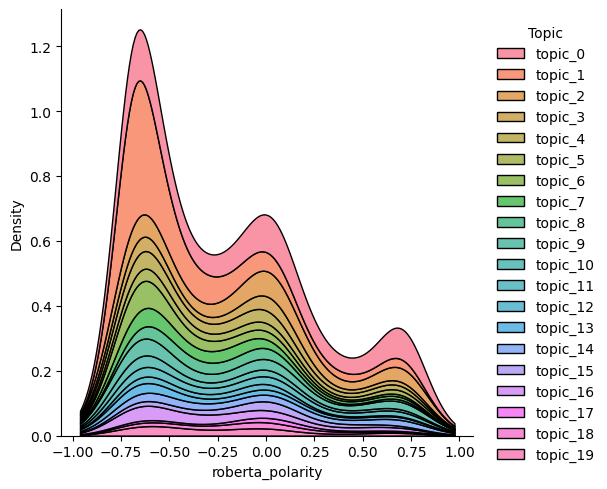

In [50]:
import seaborn as sns

import pandas as pd
df = pd.read_csv("Senti_merged_data.csv")
sns.displot(df, x="roberta_polarity", hue="Topic", kind="kde", multiple="stack")
# sns.displot(df, x="roberta_polarity", kind="kde", bw_adjust=0.5)

C:\Users\Sia\AppData\Local\Temp\ipykernel_8600\4183661603.py:6: UserWarning: 
The palette list has fewer values (10) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.displot(df, x="roberta_polarity", hue="Topic", kind="kde", multiple="stack", palette=sns.color_palette("bright"))


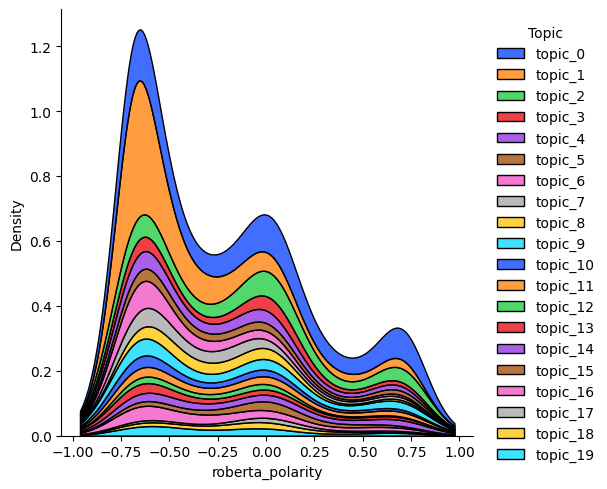

In [12]:

import seaborn as sns

import pandas as pd
# sns.set(style="whitegrid")
df = pd.read_csv("Senti_merged_data.csv")
sns.displot(df, x="roberta_polarity", hue="Topic", kind="kde", multiple="stack", palette=sns.color_palette("bright"))

C:\Users\Sia\AppData\Local\Temp\ipykernel_8600\1495531842.py:6: UserWarning: 
The palette list has fewer values (10) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.displot(df, x="roberta_polarity", hue="Topic", kind="kde", fill=True, palette=sns.color_palette("bright"), height=10, aspect=1.5)


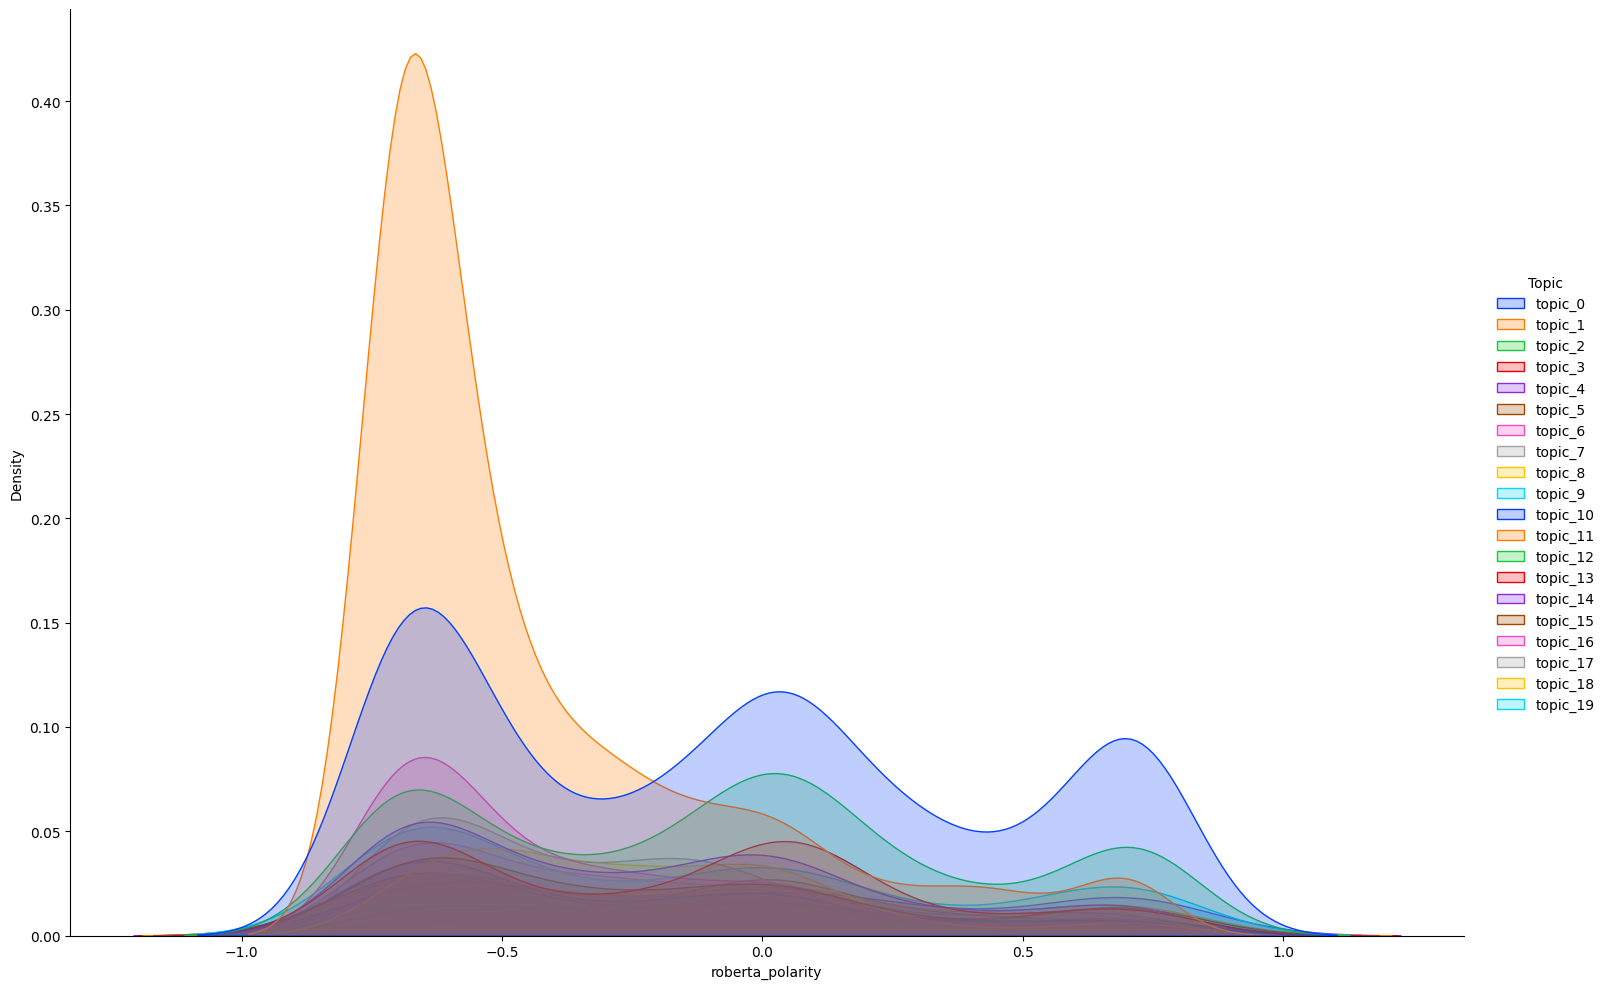

In [22]:
import seaborn as sns

import pandas as pd
# sns.set(style="whitegrid")
df = pd.read_csv("Senti_merged_data.csv")
sns.displot(df, x="roberta_polarity", hue="Topic", kind="kde", fill=True, palette=sns.color_palette("bright"), height=10, aspect=1.5)

C:\Users\Sia\AppData\Local\Temp\ipykernel_8600\1865593951.py:7: UserWarning: 
The palette list has fewer values (10) than needed (18) and will cycle, which may produce an uninterpretable plot.
  sns.displot(df, x="roberta_polarity", hue="Topic", kind="kde", fill=True, height=10, aspect=1.5, palette=sns.color_palette("bright"))


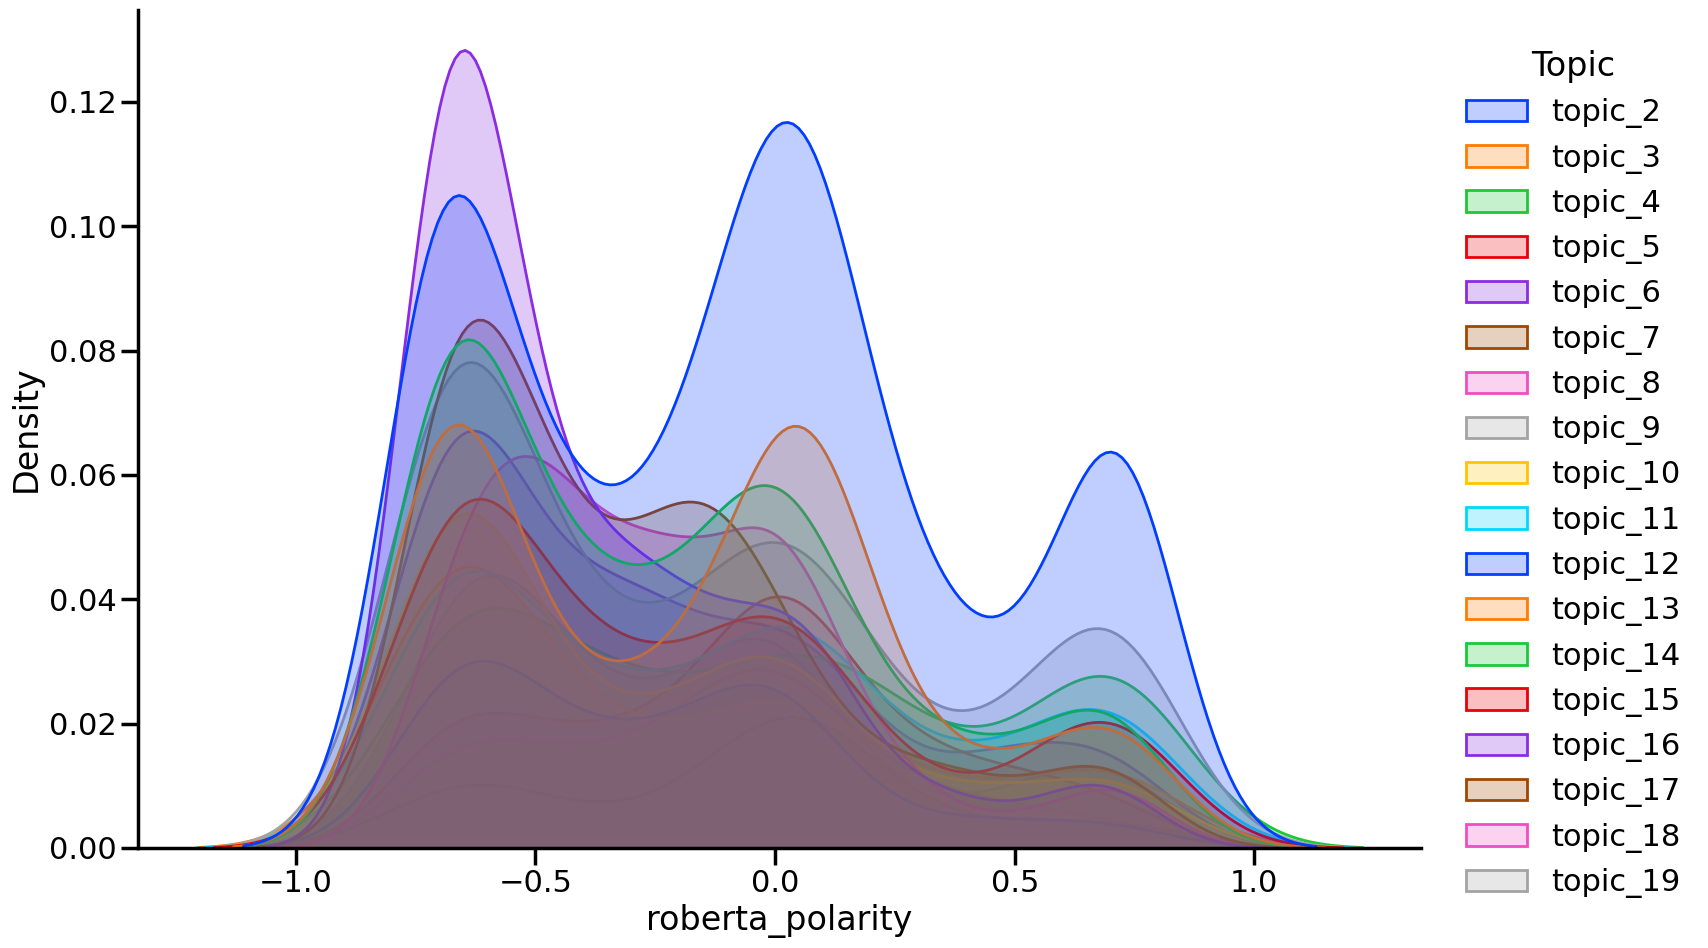

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set_context("poster")
# sns.set(style="whitegrid")
df = pd.read_csv("Senti_merged_data_minus0and1.csv")
sns.displot(df, x="roberta_polarity", hue="Topic", kind="kde", fill=True, height=10, aspect=1.5, palette=sns.color_palette("bright"))
plt.savefig("SentiPlot_minus0and1.png", dpi=300)

C:\Users\Sia\AppData\Local\Temp\ipykernel_8600\1407564564.py:7: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.displot(df, x="roberta_polarity", hue="Topic", kind="kde", fill=True, height=10, aspect=1.5, palette=sns.color_palette("bright"))


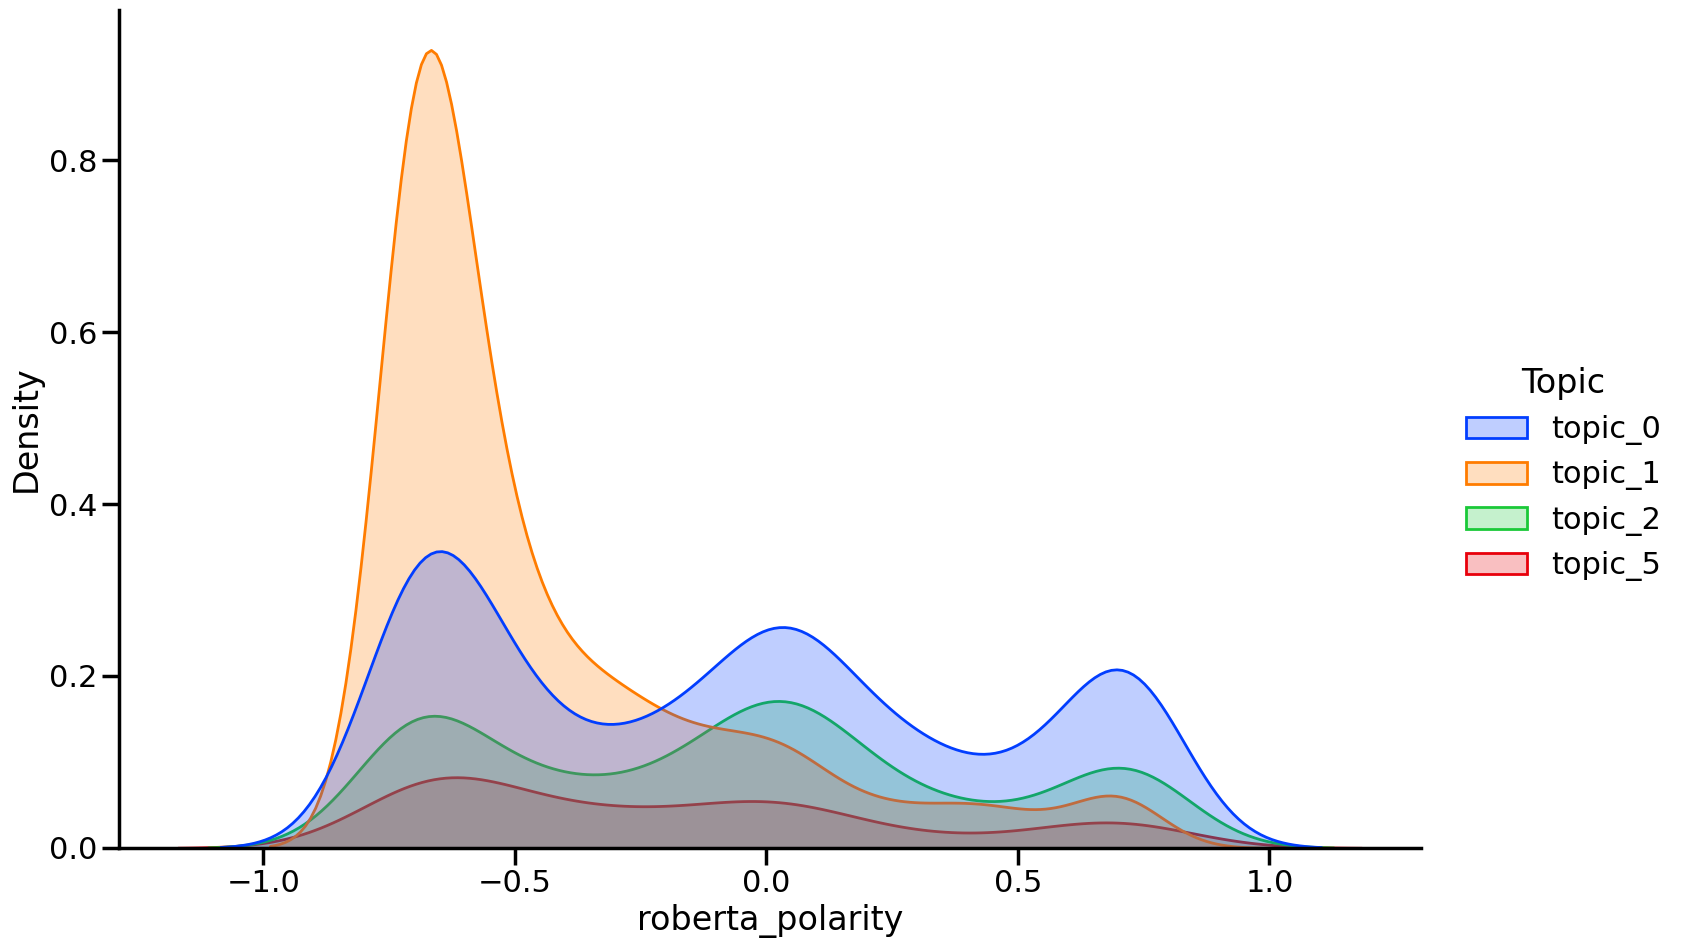

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set_context("poster")
# sns.set(style="whitegrid")
df = pd.read_csv("Senti_merged_data_0_1_2_5.csv")
sns.displot(df, x="roberta_polarity", hue="Topic", kind="kde", fill=True, height=10, aspect=1.5, palette=sns.color_palette("bright"))
plt.savefig("Senti_merged_data_0_1_2_5.png", dpi=300)

C:\Users\Sia\AppData\Local\Temp\ipykernel_8600\692891092.py:7: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.displot(df, x="roberta_polarity", hue="Topic", kind="kde", fill=True, height=10, aspect=1.5, palette=sns.color_palette("bright"))


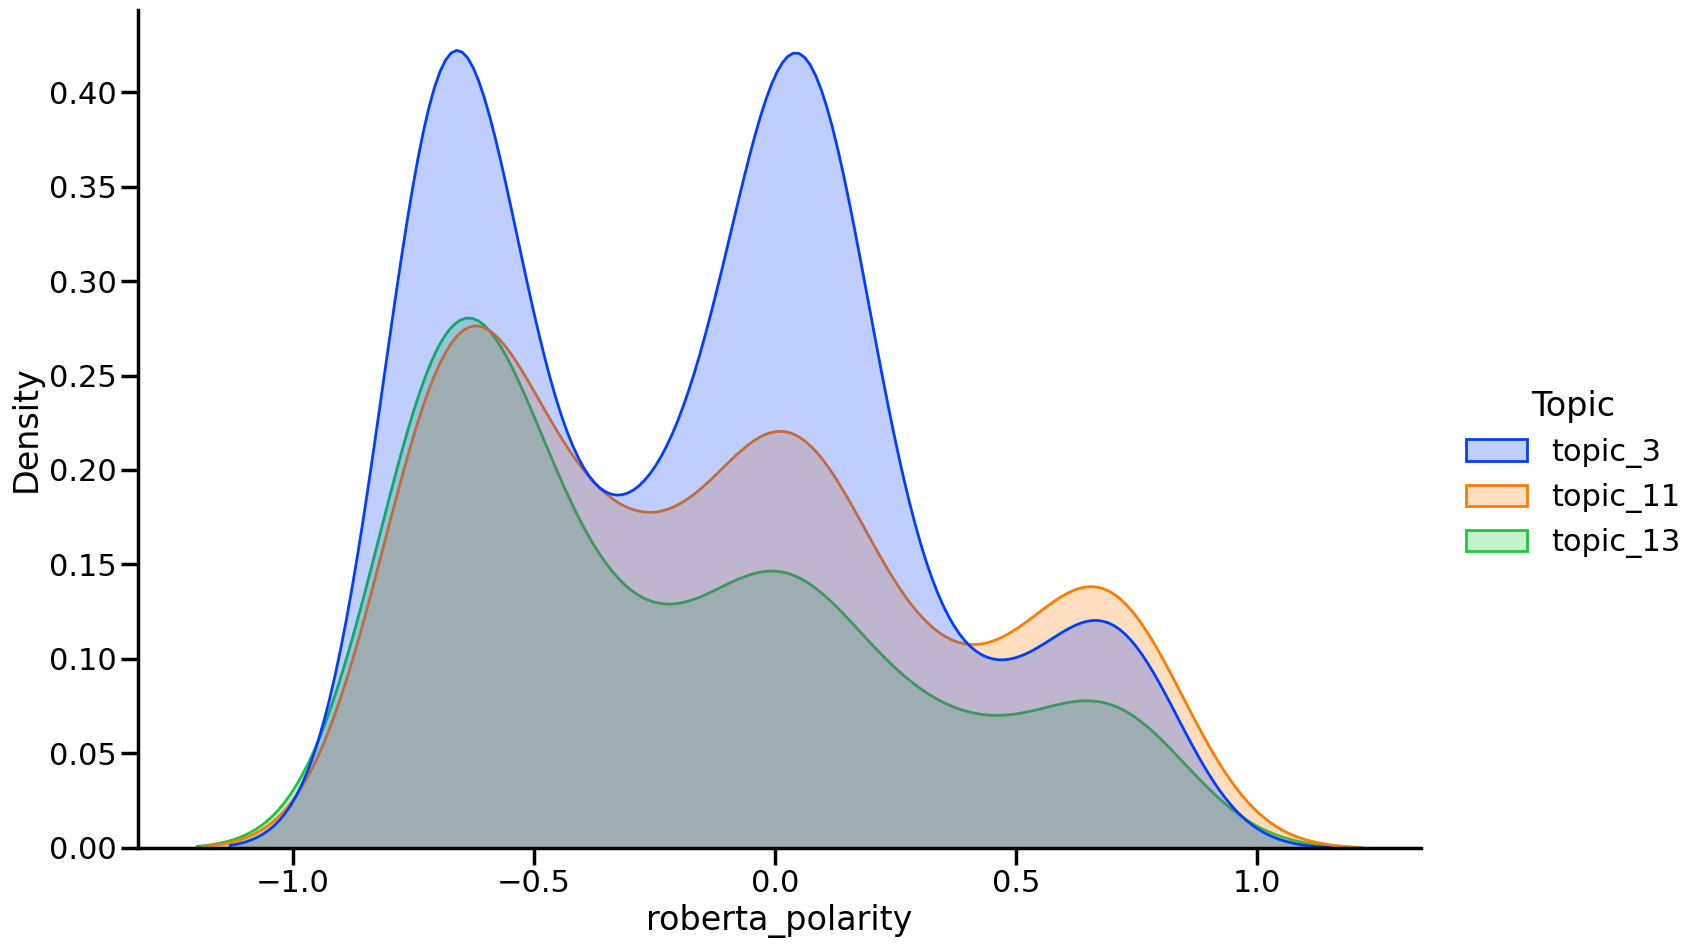

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set_context("poster")
# sns.set(style="whitegrid")
df = pd.read_csv("Senti_merged_data_3_11_13.csv")
sns.displot(df, x="roberta_polarity", hue="Topic", kind="kde", fill=True, height=10, aspect=1.5, palette=sns.color_palette("bright"))
plt.savefig("Senti_merged_data_3_11_13.png", dpi=300)

C:\Users\Sia\AppData\Local\Temp\ipykernel_8600\4083430670.py:7: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.displot(df, x="roberta_polarity", hue="Topic", kind="kde", fill=True, height=10, aspect=1.5, palette=sns.color_palette("bright"))


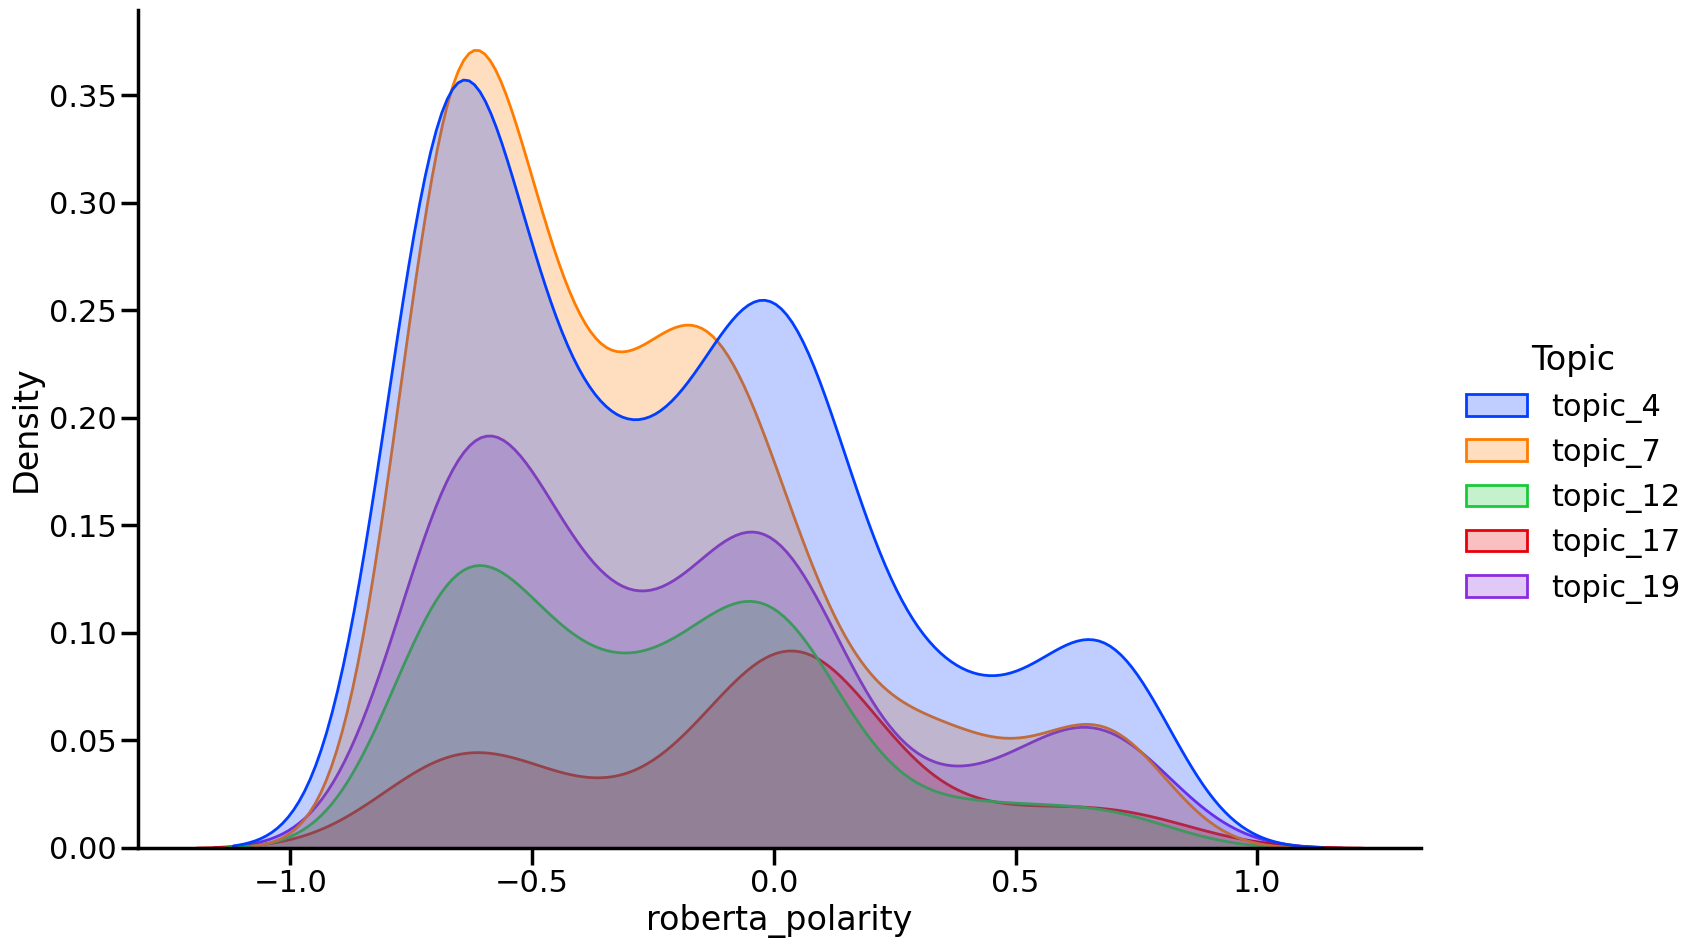

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set_context("poster")
# sns.set(style="whitegrid")
df = pd.read_csv("Senti_merged_data_4_7_12_17_19.csv")
sns.displot(df, x="roberta_polarity", hue="Topic", kind="kde", fill=True, height=10, aspect=1.5, palette=sns.color_palette("bright"))
plt.savefig("Senti_merged_data_4_7_12_17_19.png", dpi=300)

C:\Users\Sia\AppData\Local\Temp\ipykernel_8600\1672605854.py:7: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.displot(df, x="roberta_polarity", hue="Topic", kind="kde", fill=True, height=10, aspect=1.5, palette=sns.color_palette("bright"))


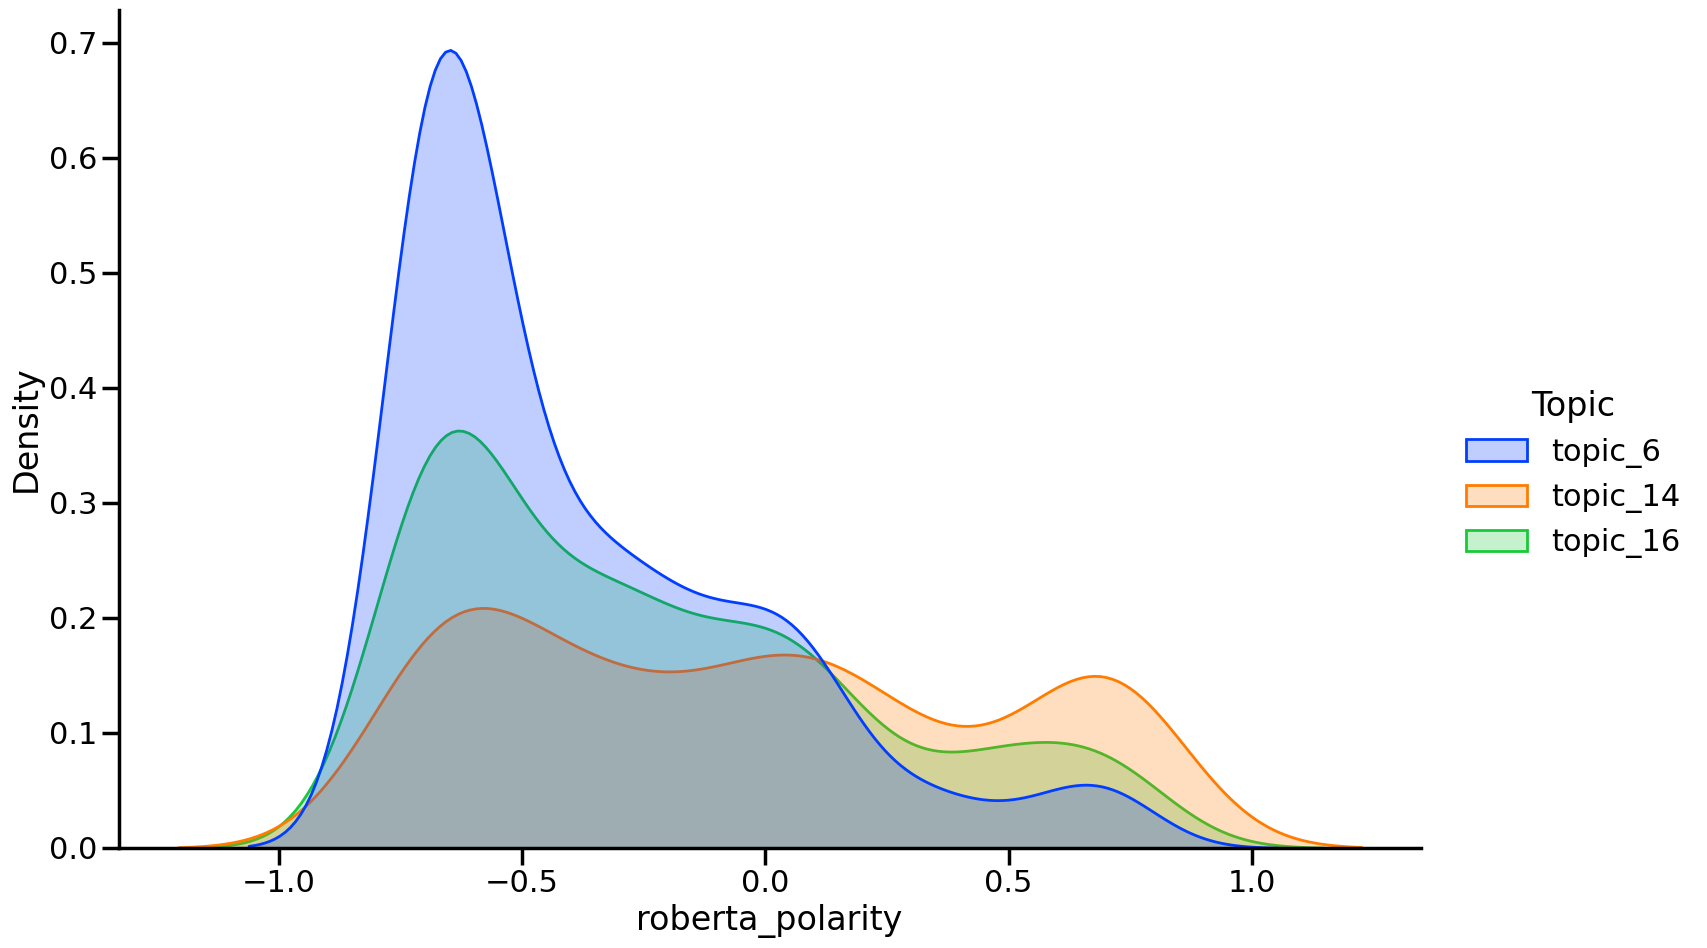

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set_context("poster")
# sns.set(style="whitegrid")
df = pd.read_csv("Senti_merged_data_6_14_16.csv")
sns.displot(df, x="roberta_polarity", hue="Topic", kind="kde", fill=True, height=10, aspect=1.5, palette=sns.color_palette("bright"))
plt.savefig("Senti_merged_data_6_14_16.png", dpi=300)

C:\Users\Sia\AppData\Local\Temp\ipykernel_8600\3929698711.py:7: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.displot(df, x="roberta_polarity", hue="Topic", kind="kde", fill=True, height=10, aspect=1.5, palette=sns.color_palette("bright"))


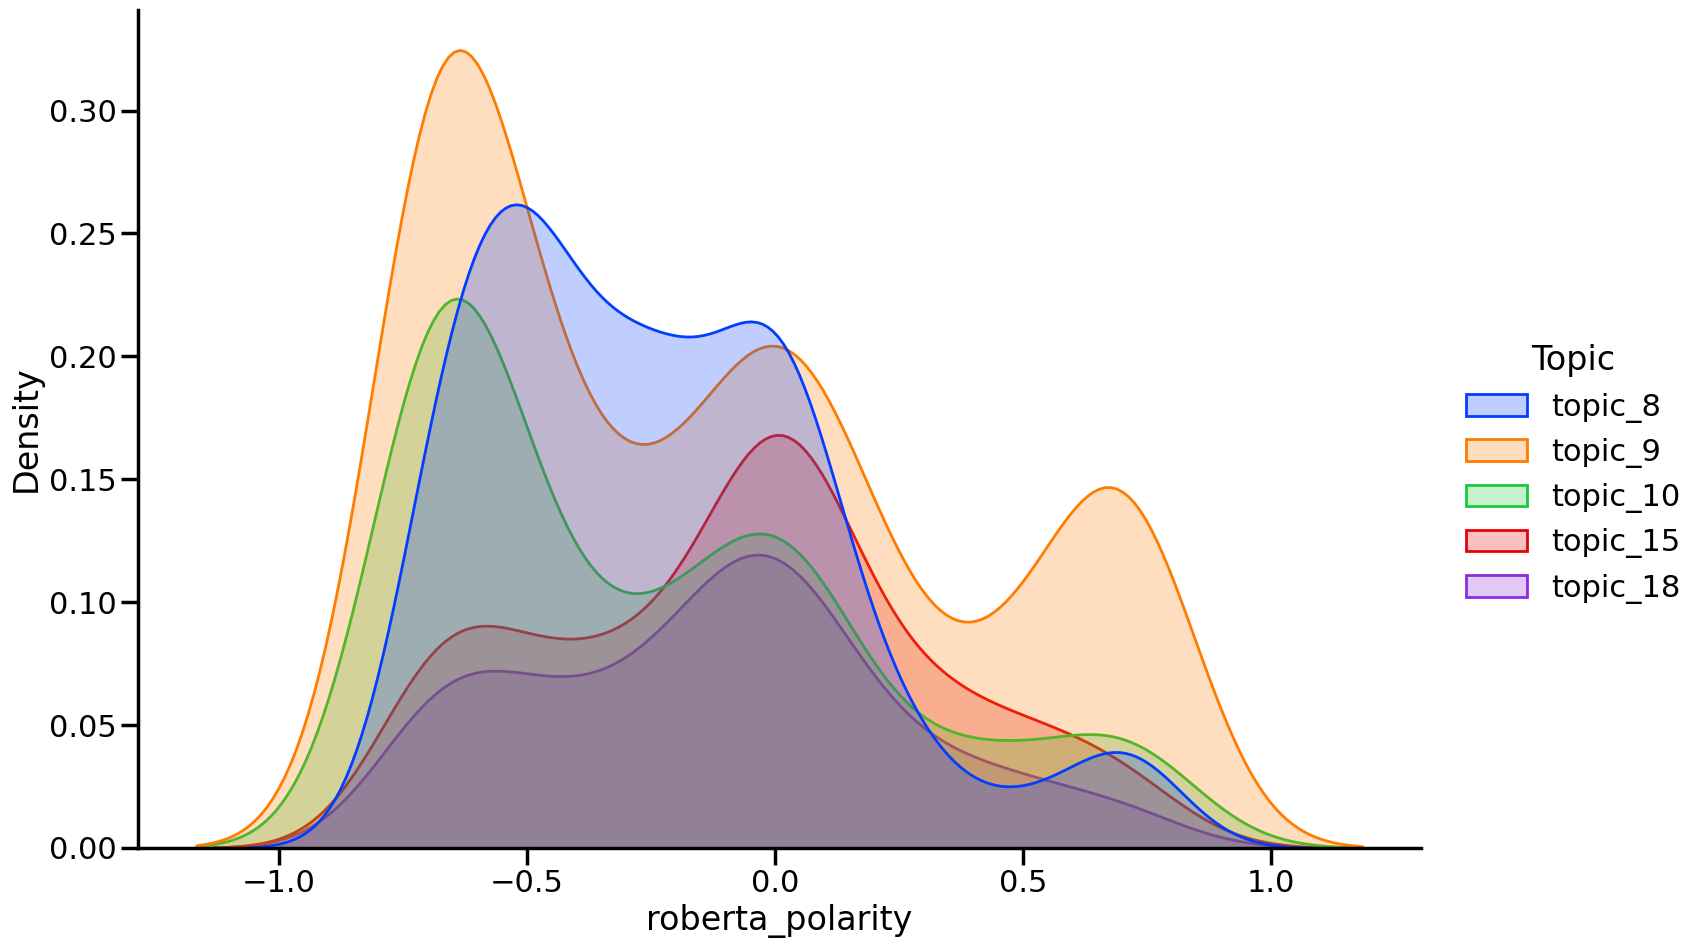

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set_context("poster")
# sns.set(style="whitegrid")
df = pd.read_csv("Senti_merged_data_8_9_10_15_18.csv")
sns.displot(df, x="roberta_polarity", hue="Topic", kind="kde", fill=True, height=10, aspect=1.5, palette=sns.color_palette("bright"))
plt.savefig("Senti_merged_data_8_9_10_15_18.png", dpi=300)

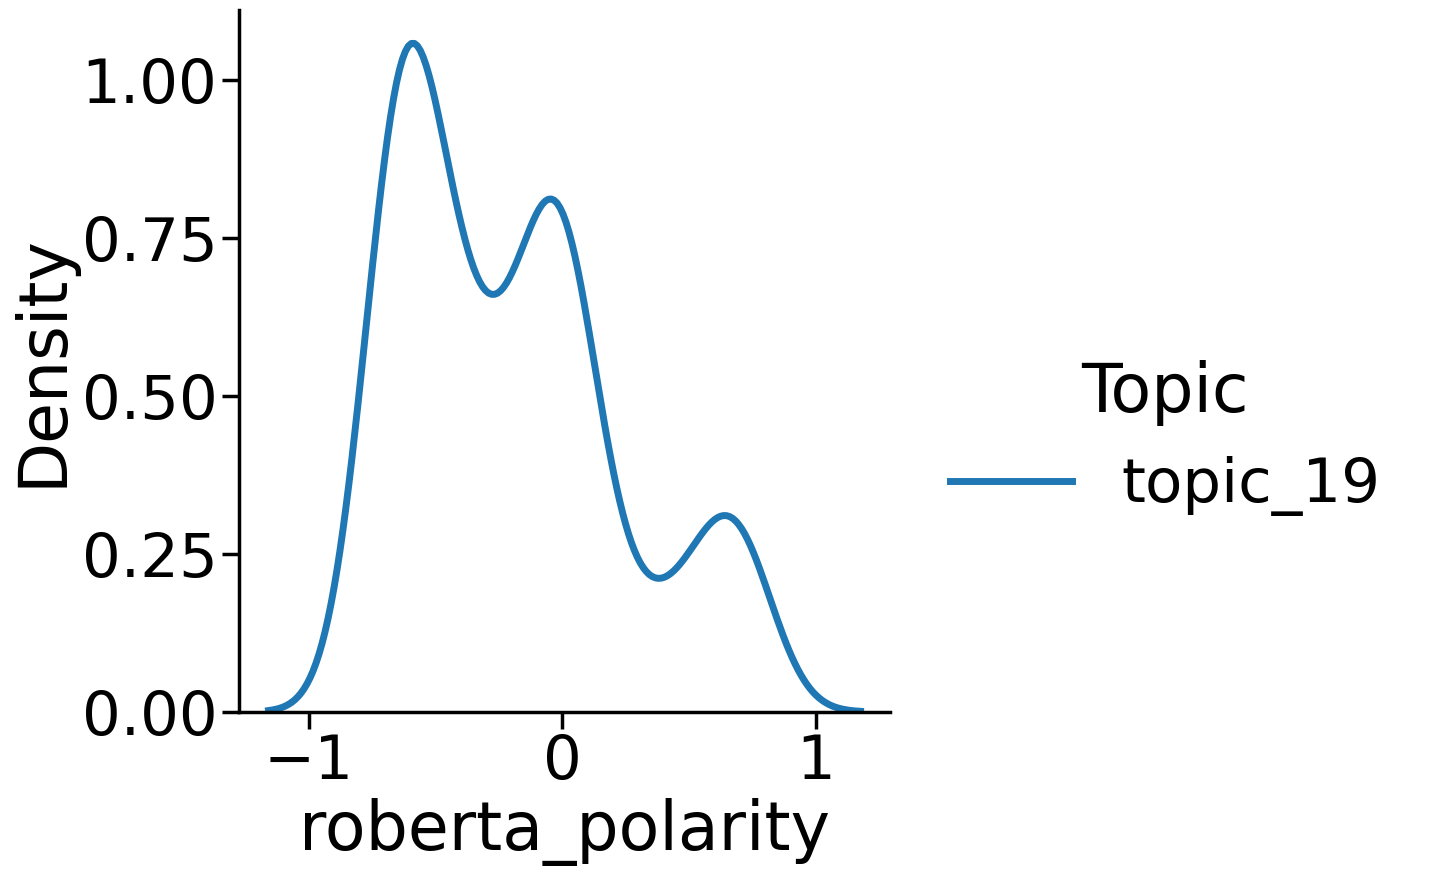

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set_context("poster", font_scale=2, rc={"lines.linewidth": 5})
# sns.set(style="whitegrid")
df = pd.read_csv("SentiTopic19.csv")
sns.displot(df, x="roberta_polarity", hue="Topic", kind="kde", fill=False, height=10, aspect=1)
plt.savefig("SentiTopic19.png", dpi=300)

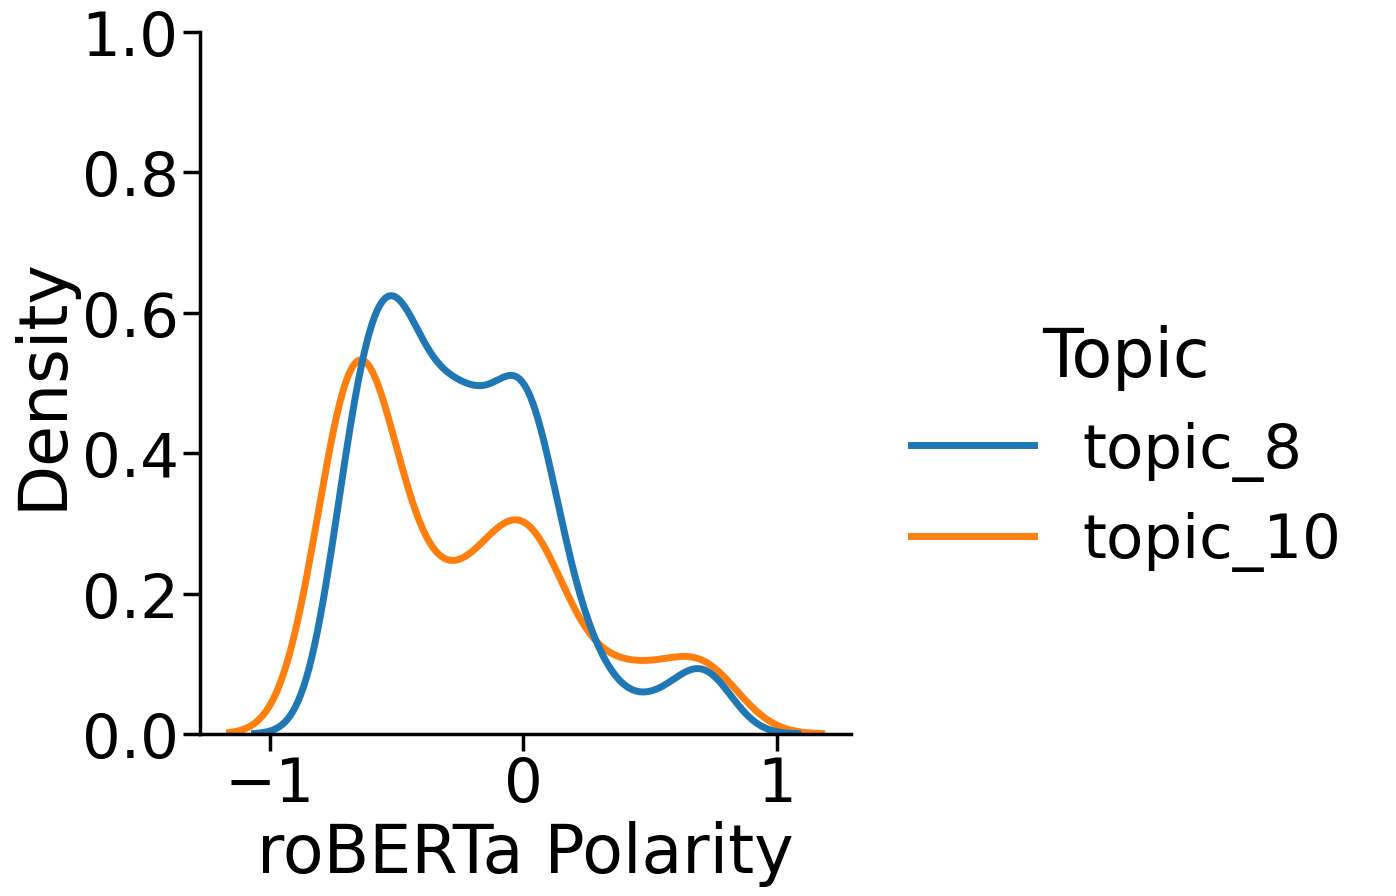

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_context("poster", font_scale=2, rc={"lines.linewidth": 5})
# sns.set(style="whitegrid")

df = pd.read_csv("Senti_Theme7.csv")

# Create the Seaborn plot
g = sns.displot(df, x="roberta_polarity", hue="Topic", kind="kde", fill=False, height=10, aspect=1)

# Access the Matplotlib axis
ax = g.fig.axes[0]  # Get the first axis from the figure

ax.set_xlabel("roBERTa Polarity")

# Set axis limits (optional)
ax.set_ylim(0, 1)

# Save the plot
plt.savefig("Senti_Theme7.png", dpi=300)